<a href="https://colab.research.google.com/github/wantfree8937/Machine/blob/main/%ED%8C%8C%EC%9D%B4%EC%8D%AC%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%B6%84%EC%84%9D%EA%B3%BC%EC%A0%9C2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# (실습) 통계 기초

**참고**

[통계 기초](https://codingalzi.github.io/datapy/from_scratch_2.html)에
정의된 다음 함수들을 활용할 수 있다.

- mean
- median
- quantile
- mode
- data_range
- iqr
- var
- std
- cov
- corrcoef

**필수 모듈**

`matplotlib.pyplot`은 막대그래프, 히스토그램, 산점도 등 데이터를 그래프로 시각화할 때 필요한
다양한 함수를 제공하는 모듈이다.

In [7]:
import matplotlib.pyplot as plt

# 그래프 설정
plt.rc('figure', figsize=(10, 6))  # 그래프 크기 지정

In [8]:
import platform
import matplotlib as mpl

# 윈도우 설정
if platform.system() == 'Windows':
    font_path = "C:/Windows/Fonts/NGULIM.TTF"
    font = mpl.font_manager.FontProperties(fname=font_path).get_name()
    plt.rc('font', family=font)
# 우분투/구글 코랩 설정
elif platform.system() == 'Linux':
    # 우분투/구글코랩의 경우 아래 명령문이 최소 한번 실행되어야 함
    !sudo apt-get install -y fonts-nanum*
    !fc-cache -fv
    
    font = "NanumBarunGothic"
    if not any(map(lambda ft: ft.name == font, mpl.font_manager.fontManager.ttflist)):
        mpl.font_manager.fontManager.addfont("/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf")
    plt.rc("font", family=font)
    plt.rc("axes", unicode_minus=False)

Reading package lists... Done
Building dependency tree       
Reading state information... Done
Note, selecting 'fonts-nanum-eco' for glob 'fonts-nanum*'
Note, selecting 'fonts-nanum' for glob 'fonts-nanum*'
Note, selecting 'fonts-nanum-gothic-light' for glob 'fonts-nanum*'
Note, selecting 'fonts-nanum-coding' for glob 'fonts-nanum*'
Note, selecting 'fonts-nanum-extra' for glob 'fonts-nanum*'
The following NEW packages will be installed:
  fonts-nanum fonts-nanum-coding fonts-nanum-eco fonts-nanum-extra
0 upgraded, 4 newly installed, 0 to remove and 23 not upgraded.
Need to get 37.6 MB of archives.
After this operation, 145 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal/universe amd64 fonts-nanum-extra all 20180306-3 [12.2 MB]
Get:2 http://archive.ubuntu.com/ubuntu focal/universe amd64 fonts-nanum all 20180306-3 [9,599 kB]
Get:3 http://archive.ubuntu.com/ubuntu focal/universe amd64 fonts-nanum-coding all 2.5-2 [1,084 kB]
Get:4 http://archive.ubun

## 데이터 준비

영산강에 설치된 승천보에서 측정한 두 개의 데이터셋이다.

- `chl_a`: 녹조 발생의 주요 요인인 클로로필-A의 수치 100개
- `flow`: 보에서 방출되는 시간당 방류량 수치 100개

두 데이터셋의 인덱스는 수질(water quality)을 가리키며,
높은 숫자일 수록 수질은 나쁘다.

In [9]:
# 클로로필-A 수치 100개

chl_a = [51, 51, 53, 53, 54, 55, 57, 57, 59, 60,
         61, 62, 63, 64, 65, 66, 67, 67, 67, 69,
         70, 71, 71, 72, 73, 75, 75, 76, 77, 79,
         81, 81, 83, 83, 85, 86, 87, 88, 88, 88,
         89, 89, 90, 91, 92, 95, 96, 96, 97, 98,
         98, 98, 99, 101, 101, 102, 102, 103, 104, 104,
         104, 104, 105, 106, 107, 108, 110, 111, 111, 112,
         112, 112, 113, 114, 114, 116, 116, 116, 117, 118,
         118, 118, 118, 119, 120, 120, 121, 122, 125, 120,
         121, 121, 121, 122, 122, 122, 122, 124, 125, 124]

In [10]:
# 시간당 방류량 수치 100개

flow = [25, 25, 24, 24, 22, 22, 21, 21, 20, 20,
        19, 19, 19, 18, 18, 18, 17, 17, 17, 16,
        16, 16, 17, 16, 17, 17, 16, 16, 16, 16,
        16, 16, 16, 16, 16, 15, 15, 15, 15, 15,
        15, 14, 15, 14, 14, 13, 13, 13, 13, 13,
        13, 13, 13, 13, 13, 13, 12, 12, 12, 12,
        12, 12, 52, 11, 11, 11, 11, 11, 12, 12,
        12, 12, 12, 11, 12, 12, 12, 11, 11, 11,
        11, 11, 11, 11, 11, 11, 11, 11, 11, 10,
        9, 9, 9, 9, 9, 9, 9, 49, 9, 9]

**문제**

각각의 데이터셋 크기가 100임을 확인하라.

힌트: `len()` 함수

In [11]:
print(len(chl_a))
print(len(flow))

100
100


**문제**

가장 높은 클로로필-A의 수치는 얼마인가?

In [12]:
max(chl_a)

125

**문제**

가장 낮은 시간당 방류량 수치는 얼마인가?

In [13]:
min(flow)

9

## 데이터 살펴보기

**문제**

클로로필-A 데이터에 포함된 값들의 빈도를 막대그래프로 그려라.

힌트: `from collections import Counter`

In [14]:
from collections import Counter

chl_counts = Counter(chl_a)
chl_counts

Counter({51: 2,
         53: 2,
         54: 1,
         55: 1,
         57: 2,
         59: 1,
         60: 1,
         61: 1,
         62: 1,
         63: 1,
         64: 1,
         65: 1,
         66: 1,
         67: 3,
         69: 1,
         70: 1,
         71: 2,
         72: 1,
         73: 1,
         75: 2,
         76: 1,
         77: 1,
         79: 1,
         81: 2,
         83: 2,
         85: 1,
         86: 1,
         87: 1,
         88: 3,
         89: 2,
         90: 1,
         91: 1,
         92: 1,
         95: 1,
         96: 2,
         97: 1,
         98: 3,
         99: 1,
         101: 2,
         102: 2,
         103: 1,
         104: 4,
         105: 1,
         106: 1,
         107: 1,
         108: 1,
         110: 1,
         111: 2,
         112: 3,
         113: 1,
         114: 2,
         116: 3,
         117: 1,
         118: 4,
         119: 1,
         120: 3,
         121: 4,
         122: 5,
         125: 2,
         124: 2})

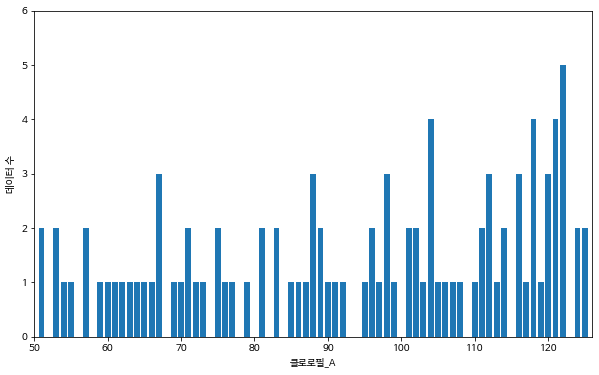

In [15]:
xs = range(51, 126)
ys = [chl_counts[x] for x in xs]

plt.bar(xs, ys)

plt.axis([50, 126, 0, 6])
plt.xlabel("클로로필_A")
plt.ylabel("데이터 수")
plt.show()

## 중심 경향성과 평균

**문제**

방류량의 평균값을 계산하라.

In [16]:
def mean(xs):
    """
    xs: 리스트로 구현된 데이터셋
    """

    return sum(xs) / len(xs)

In [17]:
mean(flow)

14.93

**문제**

방류량의 중앙값을 계산하라.

In [18]:
# 리스트의 길이가 짝수일 때
def _median_even(xs):
    sorted_xs = sorted(xs)
    high_midpoint = len(xs) // 2
    mean_value = (sorted_xs[high_midpoint - 1] + sorted_xs[high_midpoint]) / 2
    return mean_value

# 리스트의 길이가 홀수일 때
def _median_odd(xs):
    sorted_xs = sorted(xs)
    midpoint = len(xs) // 2
    mean_value = sorted_xs[midpoint]
    return mean_value

# 짝수/홀수 구분
def median(xs):
    if len(xs) % 2 == 0:
        return _median_even(xs)
    else:
        return _median_odd(xs)

In [19]:
median(flow)

13.0

**문제**

방류량의 최빈값을 계산하라.

In [20]:
def mode(xs):
    """
    최빈값
    """
    # Counter 객체 생성
    counts = Counter(xs)
    # 키값의 최댓값 확인
    max_count = max(counts.values())
    # 최대 키값을 갖는 키들의 집합
    modes = {x_i for x_i, count in counts.items() if count == max_count}
    return modes

In [21]:
mode(flow)

{11}

**문제**

방류량의 제1, 제3 사분위수를 계산하라.

In [22]:
def quantile(xs, p):
    """
    xs: 데이터셋
    p: 상위 p% 위치
    """
    
    xs_sorted = sorted(xs) # 정렬
    p_index = int(p * len(xs)) # p%에 해당하는 인덱스

    return xs_sorted[p_index]

In [23]:
print(quantile(flow, 0.25)) # 제1 사분위수
print(quantile(flow, 0.75)) # 제3 사분위수

11
16


## 산포도와 분산

**문제**

클로로필-A 데이터의 범위를 계산하라.

In [24]:
def data_range(xs):
    return max(xs) - min(xs)

In [25]:
data_range(chl_a)

74

**문제**

클로로필-A 데이터의 분산을 계산하라.

In [26]:
# 벡터 내적 함수
def dotV(v, w):
    assert len(v) == len(w), "벡터들의 길이가 동일해야 함"""

    return sum(v_i * w_i for v_i, w_i in zip(v, w))

def dev_mean(xs):
    """평균값과의 차이 계산"""
    mu = mean(xs)
    return [x - mu for x in xs]

def sum_of_squares(v):
    """반환값: v_1 * v_1 + ... + v_n * v_n"""
    return dotV(v, v)

In [27]:
def var(xs):
    """
    분산값 계산. 단, 2개 이상의 데이터가 있어야 함.
    """
    
    assert len(xs) >= 2, "두 개 이상의 데이터 필요"

    n = len(xs)
    deviations = dev_mean(xs)
    deviation_sum = sum_of_squares(deviations)
    return deviation_sum / (n - 1)

In [28]:
var(chl_a)

511.9195959595961

**문제**

클로로필-A 데이터의 표준편차를 계산하라.

In [29]:
import math

def std(xs):
    return math.sqrt(var(xs))

In [30]:
std(chl_a)

22.62564023314249

## 선형 상관관계

**문제**

클로로필-A와 시간당 방류량 사이의 공분산을 계산하고
두 데이터 사이의 상관관계를 설명하라.

In [31]:
def cov(xs, ys):
    assert len(xs) == len(ys), "xs와 ys의 길이가 같아야 함."

    return dotV(dev_mean(xs), dev_mean(ys)) / (len(xs) - 1)

In [32]:
cov(chl_a, flow)

-66.88868686868692

공분산이 음수이기 때문에 클로로필_A가 증가 할수록 시간당 방류량이 감소하는 경향이 있다.

**문제**

클로로필-A와 시간당 방류량 사이의 피어슨 상관계수를 계산하고
두 데이터 사이의 선형 상관관계를 설명하라.

In [33]:
def corrcoef(xs, ys):
    assert len(xs) == len(ys), "xs와 ys의 길이가 같아야 함."

    stdev_x = std(xs) # xs의 표준편차
    stdev_y = std(ys) # ys의 표준편차

    if stdev_x > 0 and stdev_y > 0:
        return cov(xs, ys) / (stdev_x * stdev_y)
    else:
        return 0    # 표준편차가 0인 데이터셋과의 선형 상관관계는 없음.

In [34]:
corrcoef(chl_a, flow)

-0.46344389682687775

피어슨 상관계수가 -0.46으로 약한 선형 상관관계를 갖는다.

## 이상치

**산점도**

x축을 방류량, y축을 클로로필-A 수치로 지정한 다음 산점도를 그려보자.

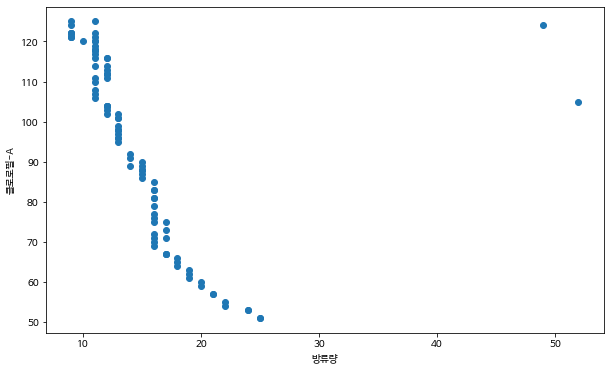

In [35]:
plt.scatter(flow, chl_a)

# 그래프 설정
plt.xlabel("방류량")           # x축 눈금 설명
plt.ylabel("클로로필-A")       # y축 눈금 설명
plt.show()

**문제**

위 산점도에 따르면 두 개의 이상치가 존재한다.
어떤 데이터가 이상치인지 설명하라.

맨 오른쪽 위에 있는 방류량이 49, 52인 두 점이 방류량에 비해 클로로필-A가 높게 나와서 이상치이다.

**문제**

클로로필-A 데이터와 방수량 두 데이터셋 모두에서
이상치에 해당하는 두 개의 값을 제거한다.

In [36]:
outlier1 = flow.index(49)
outlier2 = flow.index(52)

In [37]:
# None을 적절한 표현식으로 대체할 것.

new_chl_a = [x for i, x in enumerate(chl_a) if i != outlier1 and i != outlier2]

In [38]:
# None을 적절한 표현식으로 대체할 것.

new_flow = [x for i, x in enumerate(flow) if i != outlier1 and i != outlier2]

In [39]:
corrcoef(new_chl_a, new_flow)

-0.9565347907790098

이상치를 제거한 두 데이터셋을 이용하여 산점도를 다시 그려라.

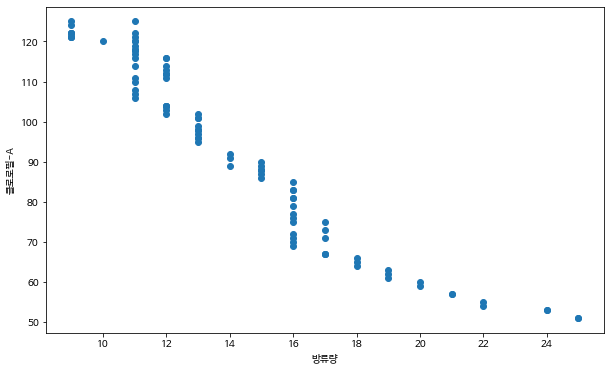

In [40]:
plt.scatter(new_flow, new_chl_a)

# 그래프 설정
plt.xlabel("방류량")           # x축 눈금 설명
plt.ylabel("클로로필-A")       # y축 눈금 설명
plt.show()

**문제**

이상치를 제거하기 이전과 이후의 데이터셋을 이용하여 아래 값들이 어떻게 달라졌는지 설명하라.

- 평균값, 중앙값, 최빈값
- 범위, 사분범위, 분산, 표준편차
- 공분산, 피어슨 상관계수

**평균값**

In [41]:
print(mean(chl_a))
print(mean(new_chl_a))

93.86
93.43877551020408


기존 평균값 93.86에서 이상치 105, 124를 제거해서 평균값이 93.43으로 내려갔다.

In [42]:
print(mean(flow))
print(mean(new_flow))

14.93
14.204081632653061


기존 평균값 14.93에서 이상치 49, 52를 제거해서 평균값이 14.20으로 내려갔다.

**중앙값**

In [43]:
print(median(chl_a))
print(median(new_chl_a))

98.0
97.5


데이터 셋의 크기가 짝수이고 기존 중앙값 98.0에서 이상치 105, 124를 제거해서 98과 97의 평균값인 97.5가 중앙값이다.

In [44]:
print(median(flow))
print(median(new_flow))

13.0
13.0


데이터 셋의 크기가 짝수이고 기존 중앙값이 13.0에서 이상치 49, 52를 제거했지만 기존과 같이 중앙값이 13이다.

**최빈값**

In [45]:
print(mode(chl_a))
print(mode(new_chl_a))

{122}
{122}


기존 최빈값이 122이기 때문에 이상치 105와 124를 제거해도 변화가 없다.

In [46]:
print(mode(flow))
print(mode(new_flow))

{11}
{11}


기존 최빈값이 11이기 때문에 이상치 49와 52를 제거해도 변화가 없다.

**범위**

In [47]:
print(data_range(chl_a))
print(data_range(new_chl_a))

74
74


범위는 최대값과 최소값만 영향을 받는다. 최대값이 125, 최소값이 51이기 때문에 이상치 105와 124를 제거해도 변화가 없다.

In [48]:
print(data_range(flow))
print(data_range(new_flow))

43
16


기존 최대값이 52, 최소값이 9에서 이상치 49와 52를 제거해서 최대값이 25로 내려가서 범위도 16으로 내려갔다.

**사분범위**

In [49]:
def iqr(xs):
    """제3사분위수 - 제1사분위수"""
    return quantile(xs, 0.75) - quantile(xs, 0.25)

In [50]:
print(quantile(chl_a, 0.25))
print(quantile(chl_a, 0.75))
print(quantile(new_chl_a, 0.25))
print(quantile(new_chl_a, 0.75))

75
116
73
114


In [51]:
print(iqr(chl_a))
print(iqr(new_chl_a))

41
41


사분범위는 제1사분위수와 제3사분위수사이의 범위를 의미한다. 기존 제1사분위수가 75, 제3사분위수가 116으로 사분범위는 41이고 이상치 제거 후 제1사분위수는 73, 제 3사분위수는 114로 사분범위는 같다.

In [52]:
print(quantile(flow, 0.25))
print(quantile(flow, 0.75))
print(quantile(new_flow, 0.25))
print(quantile(new_flow, 0.75))

11
16
11
16


In [53]:
print(iqr(flow))
print(iqr(new_flow))

5
5


이상치 49, 52가 너무 커서 사분범위에 영향을 주지 않았다.

**분산**

In [54]:
print(var(chl_a))
print(var(new_chl_a))

511.9195959595961
511.6508520934147


분산은 평균값을 기준으로 얼마나 퍼져있나를 의미한다. 이상치 105, 124가 평균값 보다 크므로 제거하면 분산이 작아진다.

In [55]:
print(var(flow))
print(var(new_flow))

40.6920202020202
14.865137807700393


이상치 49, 52가 평균값에 비해 많이 크므로 제거하면 분산이 많이 작아진다.

**표준편차**

In [56]:
print(std(chl_a))
print(std(new_chl_a))

22.62564023314249
22.61970053058649


In [57]:
print(std(flow))
print(std(new_flow))

6.379029722616144
3.8555334011911233


표준편차는 분산의 제곱근이다.

**공분산**

In [59]:
print(cov(chl_a, flow))
print(cov(new_chl_a, new_flow))

-66.88868686868692
-83.42036608457812


이상치를 제거함으로써 뚜렷한 선형관계를 갖는다.

**피어슨 상관계수**

In [60]:
print(corrcoef(chl_a, flow))
print(corrcoef(new_chl_a, new_flow))

-0.46344389682687775
-0.9565347907790098


이상치를 제거해서 강한 음의 선형관계를 갖는다.